# **Análisis Predictivo**

**Objetivos:**

- Comprender los fundamentos del análisis predictivo

- Aplicar modelos de regresión y clasificación
- Evaluar el rendimiento de los modelos con métricas clave
- Explorar técnicas de validación de modelos
- Introducir modelos de series temporales (ARIMA/SARIMA)
- Descomponer series temporales en sus componentes

**Stack:**

[![techs](https://skills.syvixor.com/api/icons?i=googlecolaboratory,python,numpy,pandas,seaborn,matplotlib,scikitlearn&perline=8&radius=40)](https://github.com/syvixor/skills-icons)

> Made with '\u{2665}' (♥) by Jesús Domínguez [@bluefeatherdev](https://github.com/bluefeatherdev)

## **Librerías Necesarias**

In [1]:
# Módulos necesarios
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris, fetch_california_housing
from statsmodels.datasets import get_rdataset
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose


## **Regresión Lineal**

> La regresión lineal es ideal para predecir valores continuos. Usaremos un conjunto de datos sobre horas de estudio y puntaje de examen para demostrar cómo predecir el puntaje basándonos en las horas estudiadas.

### Predicción de resultados numéricos

Coeficiente de regresión (pendiente): [4.90517241]
Intercepto: 48.896551724137936
Error cuadrático medio: 7.414573424494676
Coeficiente de determinación R^2: 0.9783357971526817


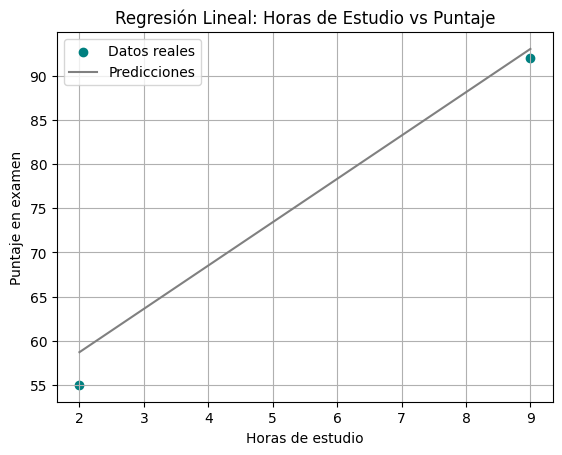

In [2]:
# Datos de ejemplo
horas_estudio = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
puntaje_examen = np.array([50, 55, 65, 70, 75, 78, 85, 90, 92, 94])

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(horas_estudio, puntaje_examen, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir los valores
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Coeficiente de regresión (pendiente):", model.coef_)
print("Intercepto:", model.intercept_)
print("Error cuadrático medio:", mean_squared_error(y_test, y_pred))
print("Coeficiente de determinación R^2:", r2_score(y_test, y_pred))

# Graficar los resultados
plt.scatter(X_test, y_test, color='teal', label='Datos reales')
plt.plot(X_test, y_pred, color='gray', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntaje en examen')
plt.title('Regresión Lineal: Horas de Estudio vs Puntaje')
plt.legend()
plt.grid(True)
plt.show()

#### Explicación

**Datos de ejemplo:**

- `horas_estudio`: Cantidad de horas que los estudiantes estudiaron (variable independiente).
- `puntaje_examen`: Puntaje obtenido en un examen (variable dependiente).

**División de datos:**
- El conjunto de datos se divide en un 80% para entrenamiento y un 20% para pruebas usando `train_test_split`.

**Creación del modelo de regresión lineal:**

- Se instancia el modelo de regresión lineal con `LinearRegression()`.

**Entrenamiento del modelo:**

- El modelo se entrena con el conjunto de entrenamiento (`X_train`, `y_train`).

**Predicción:**

- Se usa el modelo entrenado para predecir el puntaje de examen basado en las horas de estudio del conjunto de prueba (`X_test`).

**Evaluación del modelo:**
- Se muestran tres métricas clave:
  - Coeficiente de regresión: Indica el impacto de cada hora de estudio en el puntaje.

  - Coeficiente de regresión: Indica el impacto de cada hora de estudio en el puntaje.

  - Intercepto: El valor del puntaje de examen cuando las horas de estudio son cero.

- Error cuadrático medio (MSE): Mide la diferencia entre los puntajes reales y los predichos.

- Coeficiente de determinación R2: Mide qué tan bien el modelo ajusta los datos.

**Gráfica de resultados:**

- Se grafican los puntos reales del conjunto de prueba (`X_test`, `y_test`) en turqueza, y la línea de predicción del modelo en gris.

## **Regresión Logística**

> La regresión logística es utilizada para problemas de clasificación binaria, donde el resultado es una probabilidad de pertenecer a una clase. En este ejemplo, predeciremos la probabilidad de que un estudiante apruebe o no un examen en función de las horas de estudio. Supongamos que si el puntaje es mayor o igual a 75, el estudiante aprueba, y si es menor a 75, reprueba.

### Predicción de probabilidades

Precisión del modelo: 1.0
Matriz de confusión:
 [[1 0]
 [0 1]]
Probabilidades de aprobación:
 [0.9939848  0.06155258]


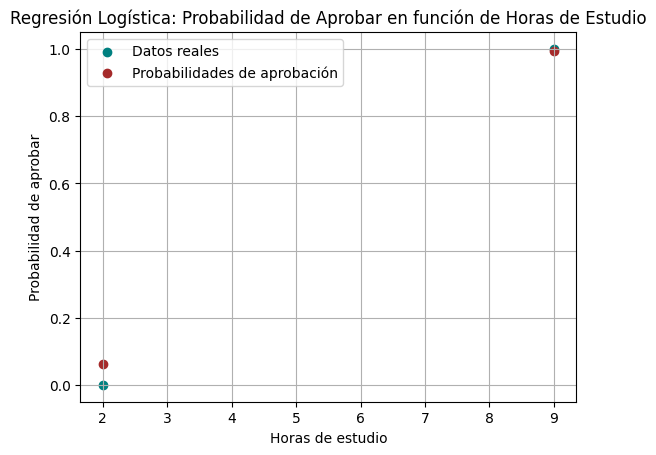

In [3]:
# Etiquetas binarias (1 = Aprobado, 0 = Reprobado)
aprobado = (puntaje_examen >= 75).astype(int)

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(horas_estudio, aprobado, test_size=0.2, random_state=42)

# Crear el modelo de regresión logística
log_model = LogisticRegression()

# Entrenar el modelo
log_model.fit(X_train, y_train)

# Predecir
y_pred_log = log_model.predict(X_test)

# Evaluar el modelo
print("Precisión del modelo:", accuracy_score(y_test, y_pred_log))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_log))

# Predicciones de probabilidad
probabilidades = log_model.predict_proba(X_test)[:, 1]
print("Probabilidades de aprobación:\n", probabilidades)

# Graficar resultados
plt.scatter(X_test, y_test, color='teal', label='Datos reales')
plt.scatter(X_test, probabilidades, color='brown', label='Probabilidades de aprobación')
plt.xlabel('Horas de estudio')
plt.ylabel('Probabilidad de aprobar')
plt.title('Regresión Logística: Probabilidad de Aprobar en función de Horas de Estudio')
plt.legend()
plt.grid(True)
plt.show()

#### Explicación

**Etiquetas binarias:**

- Se crean etiquetas binarias a partir de los puntajes de examen:

  - 1 si el puntaje es mayor o igual a 75 (aprobado).

  - 0 si es menor a 75 (reprobado).

**División de los datos:**

- Los datos se dividen en conjunto de entrenamiento (80%) y conjunto de prueba (20%) usando `train_test_split`.

**Creación del modelo de regresión logística:**

- Se instancia el modelo de regresión logística con `LogisticRegression()`.

**Entrenamiento del modelo:**

- El modelo se entrena con los datos de entrenamiento (`X_train`, `y_train`), donde se utilizan las horas de estudio para predecir si el estudiante aprueba o no.

**Predicción:**

- El modelo predice si los estudiantes aprobaron o reprobaron en el conjunto de prueba (`X_test`) usando el método predict.

**Evaluación del modelo:**

- Precisión del modelo: Calcula cuántas predicciones fueron correctas.

- Matriz de confusión: Muestra cuántos estudiantes fueron correctamente o incorrectamente clasificados como aprobados o reprobados.

**Predicción de probabilidades:**

- Se usa el método `predict_proba` para obtener la probabilidad de que cada estudiante apruebe el examen.

**Gráfica de los resultados:**

- Se grafican las etiquetas reales (aprobado/reprobado) en turqueza y las probabilidades de aprobación predichas por el modelo en marrón, con base en las horas de estudio.

- Esto permite visualizar cómo cambia la probabilidad de aprobar según el número de horas estudiadas.


## **Árboles de Decisión**

> Un árbol de decisión divide los datos en subconjuntos basados en valores de las variables de entrada, siguiendo un enfoque de "si-entonces". Cada nodo del árbol representa una característica, cada rama una decisión y cada hoja una predicción.

### Primer ejemplo

Precisión del Árbol de Decisión: 1.0


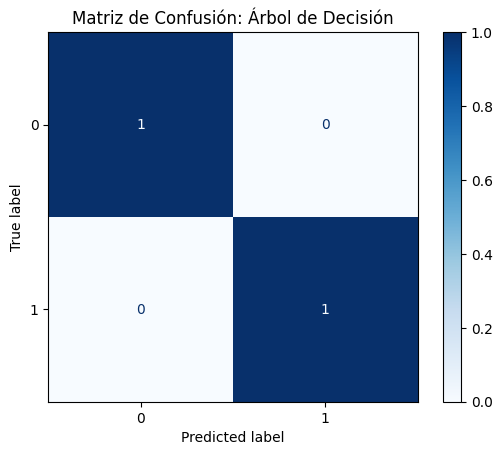

In [4]:
# Creación del modelo de árbol de decisión
tree_model = DecisionTreeClassifier()

# Entrenamiento del modelo
tree_model.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred_tree = tree_model.predict(X_test)

# Evaluación del modelo
print("Precisión del Árbol de Decisión:", accuracy_score(y_test, y_pred_tree))

# Matriz de confusión
disp = ConfusionMatrixDisplay.from_estimator(tree_model, X_test, y_test, cmap='Blues')
plt.title('Matriz de Confusión: Árbol de Decisión')
plt.show()

#### Explicación

**Creación del modelo de árbol de decisión:**

- Se instancia el modelo de árbol de decisión con `DecisionTreeClassifier()`. Este algoritmo crea un árbol de decisiones que realiza predicciones basadas en reglas "si-entonces", segmentando los datos en subconjuntos.

**Entrenamiento del modelo:**

- El modelo se entrena usando el conjunto de entrenamiento (`X_train`, `y_train`). Esto permite que el árbol aprenda los patrones en los datos para predecir si un estudiante aprobará o no basándose en las horas de estudio.

**Predicción en el conjunto de prueba:**

- Se realizan predicciones en el conjunto de prueba (`X_test`) usando el modelo entrenado. El modelo genera predicciones de si los estudiantes aprobaron o reprobaron.

**Evaluación del modelo:**

- Se calcula la precisión del modelo usando `accuracy_score`, que mide el porcentaje de predicciones correctas del modelo comparando las predicciones con los resultados reales.

**Visualización de la Matriz de Confusión:**

- Se utiliza `ConfusionMatrixDisplay.from_estimator` para generar y visualizar la matriz de confusión, la cual muestra el rendimiento del modelo al clasificar las instancias correctamente (aprobados/reprobados) o incorrectamente.

- La matriz de confusión permite ver cómo se comporta el modelo con respecto a los errores de clasificación.


### Segundo ejemplo

> Usaremos un conjunto de datos sobre deportes, como predicción de si un jugador será seleccionado o no en un equipo de fútbol, en función de varias características como la cantidad de goles, asistencias y faltas cometidas.

> En este caso, se utiliza un modelo de Árbol de Decisión para predecir si un jugador será seleccionado en función de sus estadísticas de goles, asistencias y faltas. La matriz de confusión y la precisión te permiten ver cómo de bien predice el modelo.

Precisión del Árbol de Decisión: 0.6666666666666666


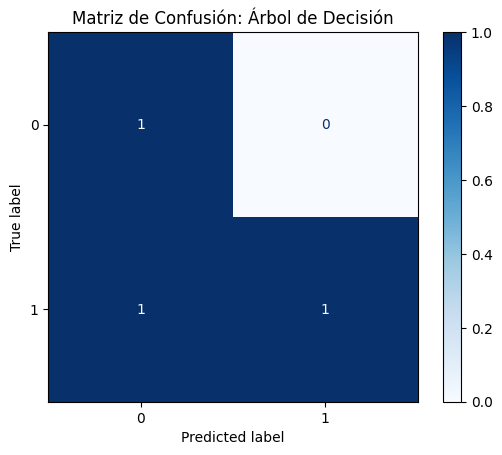

In [5]:
# Datos de ejemplo: rendimiento de jugadores
data = {
  'Goles':        [5, 2, 7, 0, 10, 8, 3, 4, 6, 1],
  'Asistencias':  [2, 1, 3, 0, 4, 2, 1, 3, 5, 0],
  'Faltas':       [1, 3, 0, 2, 1, 2, 4, 1, 0, 3],
  'Seleccionado': [1, 0, 1, 0, 1, 1, 0, 1, 1, 0],
  # 1 = Seleccionado, 0 = No seleccionado
}

# Convertir los datos en un DataFrame
df = pd.DataFrame(data)

# Dividir las características (X) y la variable objetivo (y)
X = df[['Goles', 'Asistencias', 'Faltas']]
y = df['Seleccionado']

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creación del modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier()

# Entrenamiento del modelo
tree_model.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred_tree = tree_model.predict(X_test)

# Evaluación del modelo
print("Precisión del Árbol de Decisión:", accuracy_score(y_test, y_pred_tree))

# Visualización de la Matriz de Confusión
disp = ConfusionMatrixDisplay.from_estimator(tree_model, X_test, y_test, cmap='Blues')
plt.title('Matriz de Confusión: Árbol de Decisión')
plt.show()



#### Explicación

**Ejes de la matriz:**

- El eje vertical (*True label*) indica las etiquetas reales, es decir, los valores verdaderos de los datos de prueba.

- El eje horizontal (*Predicted label*) indica las etiquetas predichas por el modelo.

**Interpretación de los valores:**

- `[1, 0]`: El modelo predijo 1 vez que un jugador no sería seleccionado (`0`), y realmente ese jugador no fue seleccionado.

- `[0, 0]`: No hay errores en las predicciones del modelo (celdas de valor cero para errores).

- `[2, 1]`: El modelo predijo correctamente 2 veces que un jugador sería seleccionado (`1`), y esos jugadores efectivamente fueron seleccionados.

En la matriz, los valores dentro de los recuadros muestran la cantidad de observaciones que caen en cada combinación de etiquetas reales y predichas.








## **Random Forest**

> Random Forest es un modelo que combina múltiples árboles de decisión, donde cada árbol se entrena con una muestra diferente de los datos (bootstrap) y predice de manera independiente. Las predicciones finales se basan en el promedio (para regresión) o el voto mayoritario (para clasificación) de todos los árboles, lo que mejora la precisión y evita el sobreajuste.

### Ejemplo

Precisión del Random Forest: 1.0


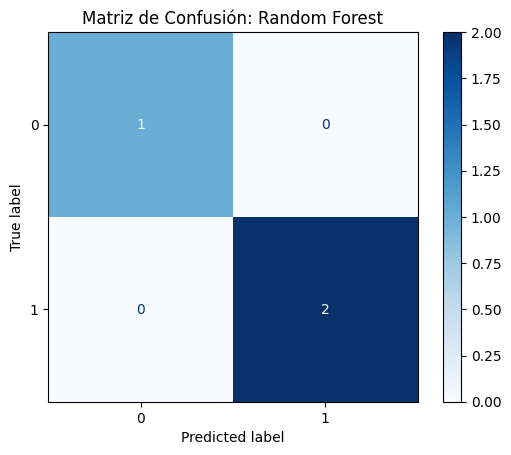

In [6]:
# Creación del modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenamiento del modelo
rf_model.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Evaluación del modelo
print("Precisión del Random Forest:", accuracy_score(y_test, y_pred_rf))

# Matriz de confusión
disp = ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='Blues')
plt.title('Matriz de Confusión: Random Forest')
plt.show()

### Explicación


> El modelo de Random Forest crea varios árboles de decisión (100 en este caso) y combina sus predicciones para dar una respuesta más precisa. El modelo predice si un jugador será seleccionado o no, y la matriz de confusión ayuda a visualizar su rendimiento.

## **Métricas de Rendimiento**

### Clasificación / Iris Dataset

> El conjunto de datos Iris es un clásico para clasificación, que contiene características de diferentes tipos de flores iris.

Precisión: 1.0
Recall: 1.0
F1 Score: 1.0


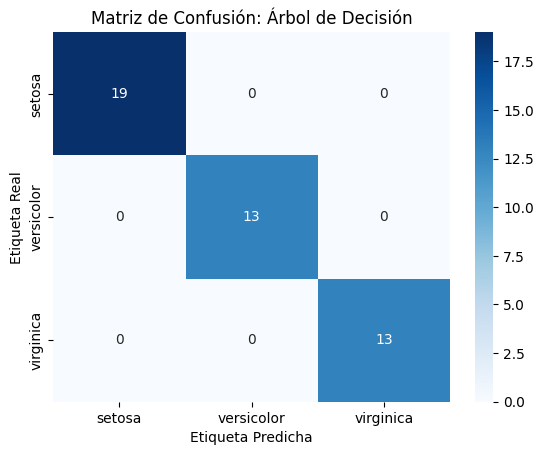

In [7]:
# Cargar el dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de árbol de decisión
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_tree = tree_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred_tree)
recall = recall_score(y_test, y_pred_tree, average='weighted')
f1 = f1_score(y_test, y_pred_tree, average='weighted')

print("Precisión:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Matriz de Confusión: Árbol de Decisión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()


### Regresión / California Housing Dataset

> El conjunto de datos California Housing se utiliza comúnmente para problemas de regresión, donde el objetivo es predecir el valor medio de las casas en varias áreas de California.

In [8]:
# Cargar el dataset California Housing
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de regresión lineal
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_lin = lin_model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred_lin)
r2 = r2_score(y_test, y_pred_lin)

print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R²):", r2)

Error Cuadrático Medio (MSE): 0.5305677824766754
Coeficiente de Determinación (R²): 0.5957702326061662


### Explicación

- **Precisión (Accuracy)**: Proporción de predicciones correctas en el modelo de clasificación.

- **Recall**: Medida de cuántos positivos reales fueron capturados por el modelo.
- **F1 Score**: Media armónica entre precisión y recall, útil para conjuntos de datos desbalanceados.
- **Error Cuadrático Medio (MSE)**: Promedio de las diferencias al cuadrado entre los valores reales y predichos en el modelo de regresión.
- **R²**: Indica qué tan bien las variables independientes predicen la variable dependiente.


## **Métodos de Validación**

> La validación cruzada es una técnica fundamental en el aprendizaje automático que se utiliza para evaluar la capacidad de generalización de un modelo. Consiste en dividir el conjunto de datos en múltiples subconjuntos para entrenar y validar el modelo en diferentes combinaciones de estos subconjuntos. Esto ayuda a asegurarse de que el modelo no esté sobreajustado a los datos de entrenamiento y que funcione bien en datos no vistos.

### K-Fold Cross-Validation

> Divide el conjunto de datos en K subconjuntos (o "folds"). El modelo se entrena K veces, cada vez utilizando un subconjunto diferente como conjunto de prueba y los restantes como conjunto de entrenamiento.

#### Ejemplo

In [9]:
# Cargar el dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Crear el modelo de árbol de decisión
tree_model = DecisionTreeClassifier()

# Validación cruzada con K=5
scores = cross_val_score(tree_model, X, y, cv=5)  # cv=5 para 5-fold

# Resultados
print("Precisión en cada pliegue:", scores)
print("Precisión media:", np.mean(scores))

Precisión en cada pliegue: [0.96666667 0.96666667 0.9        0.96666667 1.        ]
Precisión media: 0.9600000000000002


#### Explicación

- **scores:** Esta lista contiene la precisión del modelo en cada pliegue de la validación cruzada. Permite evaluar la variabilidad de la precisión a través de diferentes subconjuntos de datos.

- **Precisión media:** Proporciona una visión general del rendimiento del modelo en el conjunto de datos completo.

## **Modelos ARIMA y SARIMA**

### Cojunto de datos de prueba

C:\Users\Jesús\AppData\Local\Temp\ipykernel_24412\3307557872.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['time'] = pd.date_range(start='1949-01-01', periods=len(data), freq='M')


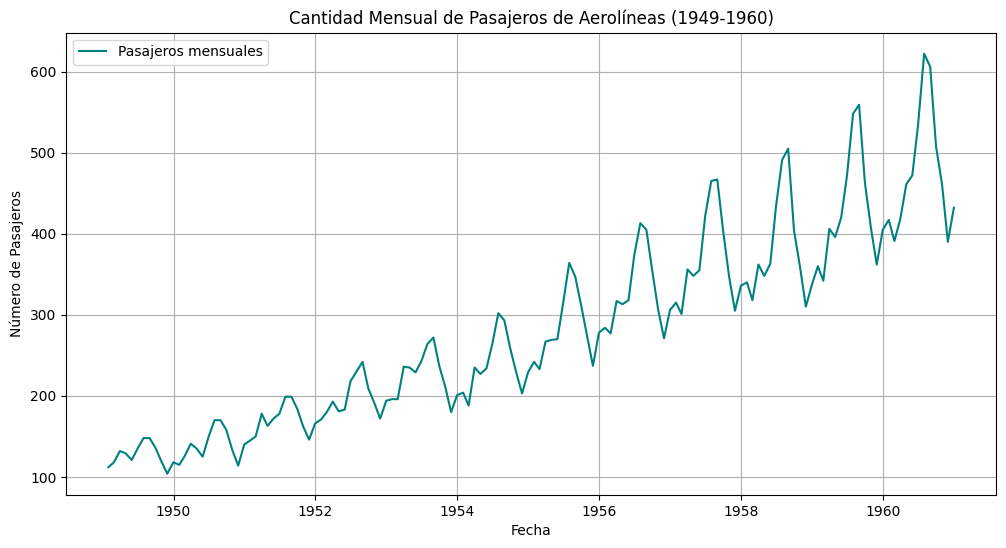

In [10]:
# Cargar el conjunto de datos AirPassengers
data = get_rdataset("AirPassengers").data

# Convertir la columna 'time' a un índice de fecha
data['time'] = pd.date_range(start='1949-01-01', periods=len(data), freq='M')
data.set_index('time', inplace=True)

# Visualizar la serie temporal
plt.figure(figsize=(12, 6))
plt.plot(data['value'], label='Pasajeros mensuales', color='teal')
plt.title('Cantidad Mensual de Pasajeros de Aerolíneas (1949-1960)')
plt.xlabel('Fecha')
plt.ylabel('Número de Pasajeros')
plt.legend()
plt.grid(True)
plt.show()

### Ajuste modelo ARIMA

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Wed, 08 Oct 2025   AIC                           1394.683
Time:                        22:29:42   BIC                           1403.571
Sample:                    01-31-1949   HQIC                          1398.294
                         - 12-31-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

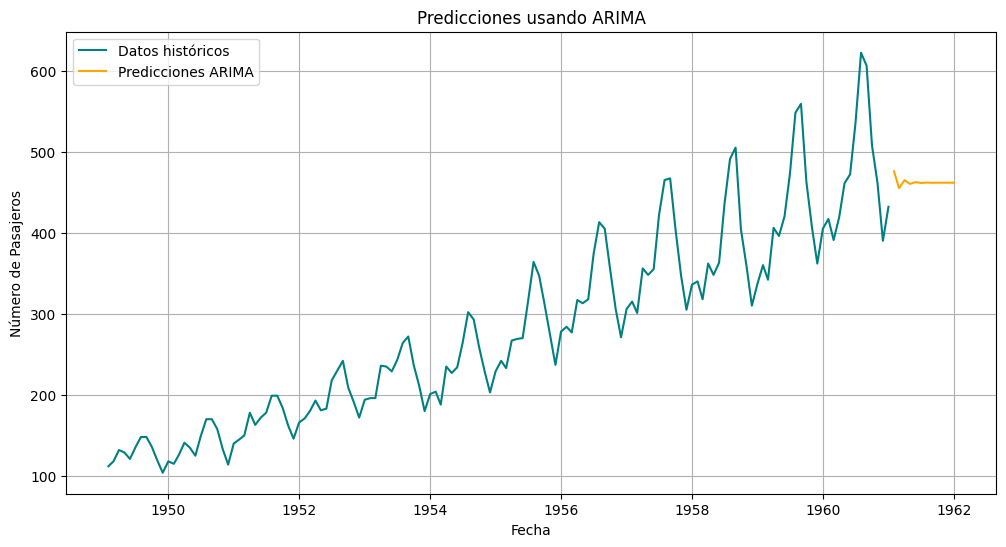

In [11]:
warnings.filterwarnings("ignore")

# Definir el modelo ARIMA (p, d, q)
model_arima = ARIMA(data['value'], order=(1, 1, 1))  # Cambia los parámetros según sea necesario
model_fit_arima = model_arima.fit()

# Resumen del modelo
print(model_fit_arima.summary())

# Predicciones
predictions_arima = model_fit_arima.forecast(steps=12)  # Predecir los próximos 12 meses

# Graficar predicciones
plt.figure(figsize=(12, 6))
plt.plot(data['value'], label='Datos históricos', color='teal')
plt.plot(pd.date_range(start=data.index[-1], periods=13, freq='M')[1:], predictions_arima, label='Predicciones ARIMA', color='orange')
plt.title('Predicciones usando ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Número de Pasajeros')
plt.legend()
plt.grid(True)
plt.show()


### Ajuste modelo SARIMA

                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -506.149
Date:                            Wed, 08 Oct 2025   AIC                           1022.299
Time:                                    22:29:43   BIC                           1036.675
Sample:                                01-31-1949   HQIC                          1028.140
                                     - 12-31-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1272      0.356     -0.358      0.721      -0.825       0.570
ma.L1         -0.2148      0.325   

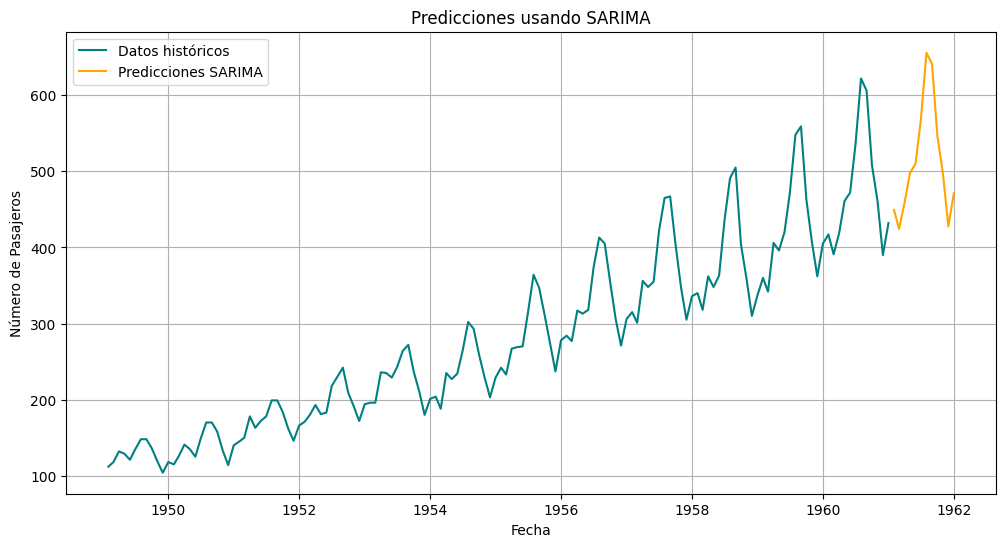

In [12]:
# Definir el modelo SARIMA (p, d, q)(P, D, Q, s)
model_sarima = SARIMAX(data['value'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Cambia los parámetros según sea necesario
model_fit_sarima = model_sarima.fit()

# Resumen del modelo
print(model_fit_sarima.summary())

# Predicciones
predictions_sarima = model_fit_sarima.forecast(steps=12)  # Predecir los próximos 12 meses

# Graficar predicciones
plt.figure(figsize=(12, 6))
plt.plot(data['value'], label='Datos históricos', color='teal')
plt.plot(pd.date_range(start=data.index[-1], periods=13, freq='M')[1:], predictions_sarima, label='Predicciones SARIMA', color='orange')
plt.title('Predicciones usando SARIMA')
plt.xlabel('Fecha')
plt.ylabel('Número de Pasajeros')
plt.legend()
plt.grid(True)
plt.show()

### Explicación

- **Visualización Inicial:** La gráfica de la serie temporal muestra la cantidad de pasajeros mensuales a lo largo del tiempo, permitiendo observar tendencias y estacionalidades.

- **Modelo ARIMA:** El resumen del modelo proporciona información sobre los parámetros ajustados. Las predicciones pueden ser visualizadas para observar cómo el modelo extrapola los datos futuros.

- **Modelo SARIMA:** Similar al ARIMA, pero este modelo tiene en cuenta los patrones estacionales en los datos. Las predicciones deberían mostrar una mejor adaptación a los picos estacionales que el modelo ARIMA simple.

## **Descomposición de series temporales**

> Ejercicio de como realizar la descomposición de series temporales utilizando el conjunto de datos "AirPassengers" que ya hemos cargado. Usaremos la librería statsmodels para esto.

### Ejemplo

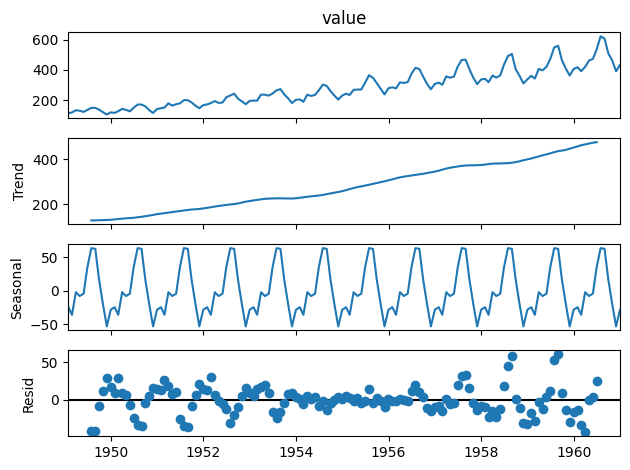

In [13]:
# Cargar el conjunto de datos AirPassengers
data = get_rdataset("AirPassengers").data

# Convertir la columna 'time' a un índice de fecha
data['time'] = pd.date_range(start='1949-01-01', periods=len(data), freq='M')
data.set_index('time', inplace=True)

# Descomposición de la serie temporal
result = seasonal_decompose(data['value'], model='additive')  # o 'multiplicative' según la naturaleza de los datos

# Graficar la descomposición
result.plot()
plt.show()

### Explicación

- **Tendencia:** Muestra la dirección general de la serie a lo largo del tiempo. En este caso, podemos observar si hay un aumento o disminución a largo plazo en el número de pasajeros.

- **Estacionalidad:** Captura los patrones que se repiten en intervalos regulares. En este conjunto de datos, podríamos esperar ver picos en la cantidad de pasajeros durante ciertos meses del año, lo que indica un comportamiento estacional.

- **Ruido:** Representa las variaciones aleatorias que no son explicadas por la tendencia ni la estacionalidad. Este componente puede ayudar a identificar anomalías en los datos.

> Made with '\u{2665}' (♥) by Jesús Domínguez [@bluefeatherdev](https://github.com/bluefeatherdev)